In [6]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df_names = pl.read_csv("asns_names.txt", separator="|").select(
    pl.col("asn").str.strip_chars(),
    pl.col("name").str.strip_chars().str.split(",").list.first()
)
df_names = pl.read_csv("asns.csv")
df2020 = pl.read_csv("data_2020.csv")
df2023 = pl.read_csv("data_2023.csv")

In [82]:
def prepare(df):
    return df \
        .with_columns(pl.col("asn").cast(pl.String))\
        .join(df_names.with_columns(pl.con("asn").cast(pl.String)), on="asn")\
        .sort("hierarchy_free", descending=True)

df2020 = prepare(df2020)
df2023 = prepare(df2023)

ComputeError: datatypes of join keys don't match - `asn`: str on left does not match `asn`: i64 on right

In [67]:
def plot(df):
    df = df.to_pandas()

    sns.set_theme(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 6))


    # Provider free
    palette = {
        'tier1': '#f08080',
        'tier2': '#98fb98',
        'cloud_provider': '#6495ed',
    }
    sns.barplot(x="name", y="provider_free", data=df, hue="type", palette=palette, edgecolor='none')

    # Tier1 free
    palette = {
        'tier1': '#cd5c5c',
        'tier2': '#98fb98',
        'cloud_provider': '#6495ed',
    }
    sns.barplot(x="name", y="tier1_free", data=df, hue="type", palette=palette, edgecolor='none')

    # Hierarchical free
    palette = {
        'tier1': '#ff0000',
        'tier2': '#008000',
        'cloud_provider': '#0000ff',
    }
    sns.barplot(x="name", y="hierarchy_free", data=df, hue="type", palette=palette, edgecolor='none')


    # Add a legend and informative axis label
    #ax.legend(ncol=1, loc="upper right", frameon=True)
    ax.legend([], [], frameon=False)
    ax.set(
        #ylim=(20e3, 70e3),
        ylabel="Number of ASes Reachable",
        xlabel="AS name",
        #title="Cloud, Tier-1, and Tier-2 networks reachability, sorted by hierarchical-free reachability"
    )
    ax.tick_params(axis='x', labelrotation=90)
    sns.despine(left=True, bottom=True)

    return ax

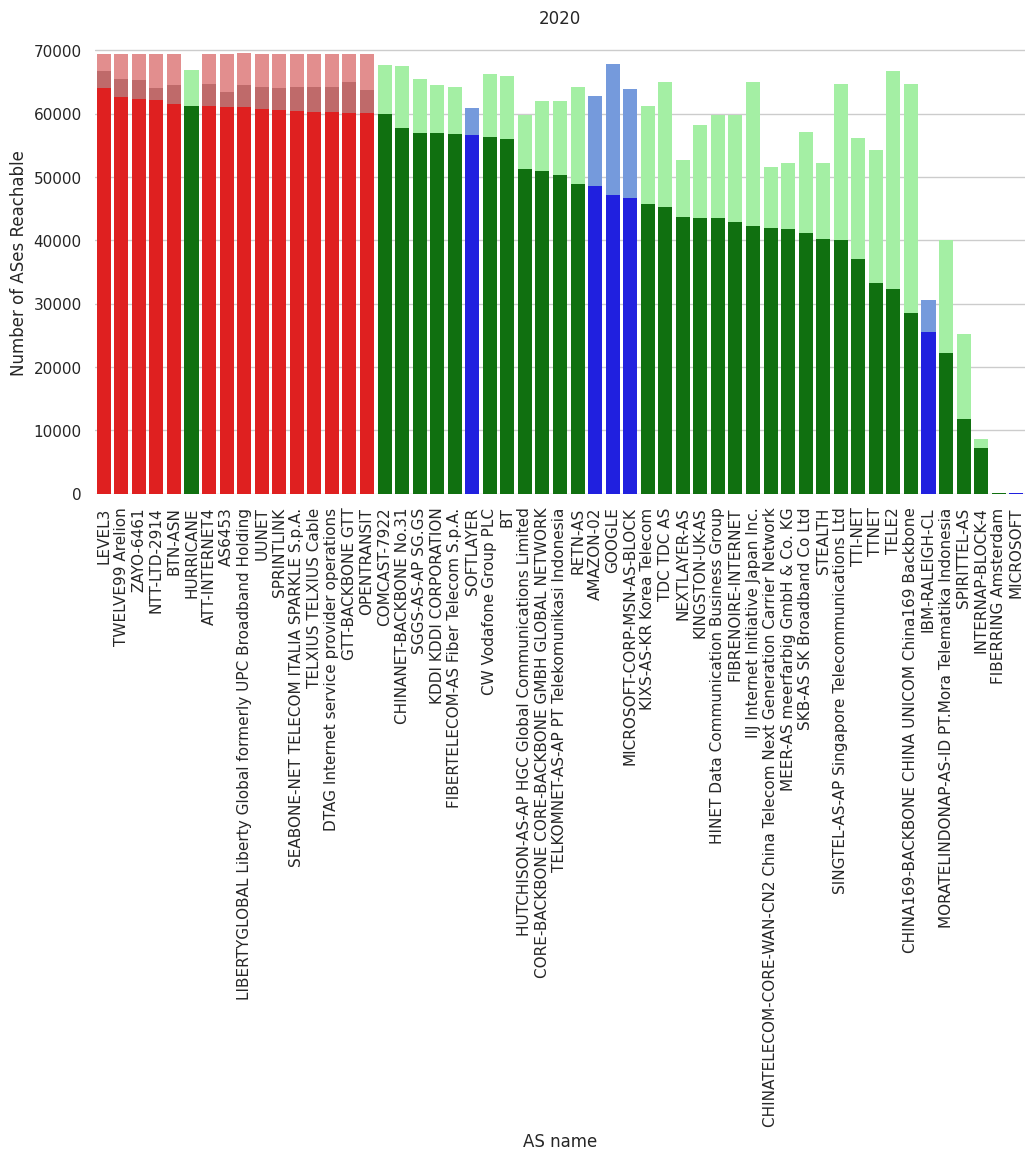

In [80]:
ax = plot(df2020)
ax.set_title("2020")
plt.show()

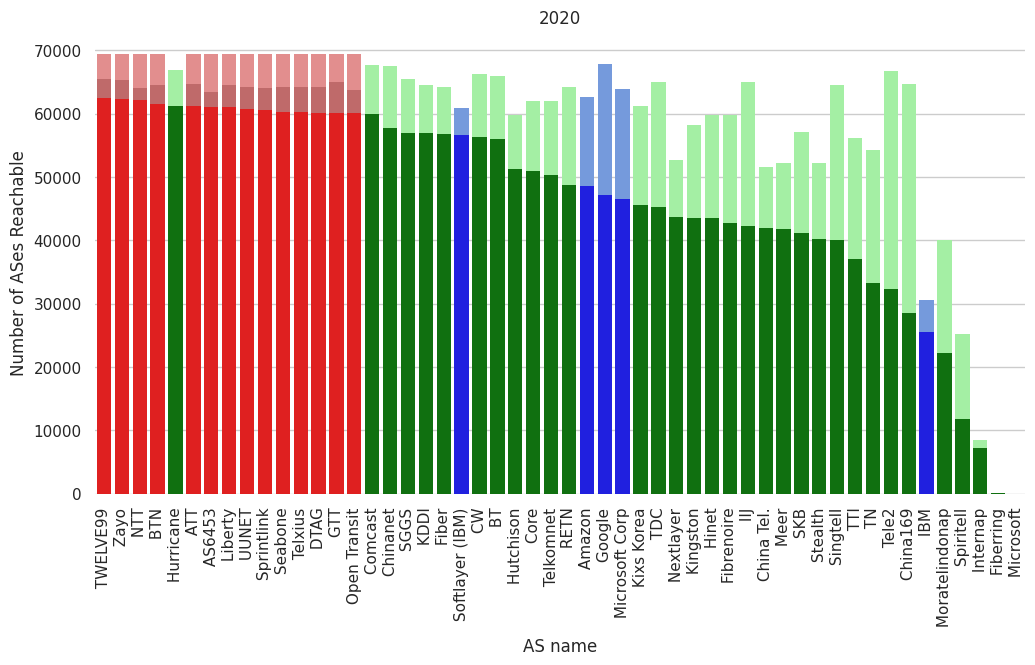

In [76]:
ax = plot(df2020)
ax.set_title("2020")
plt.show()


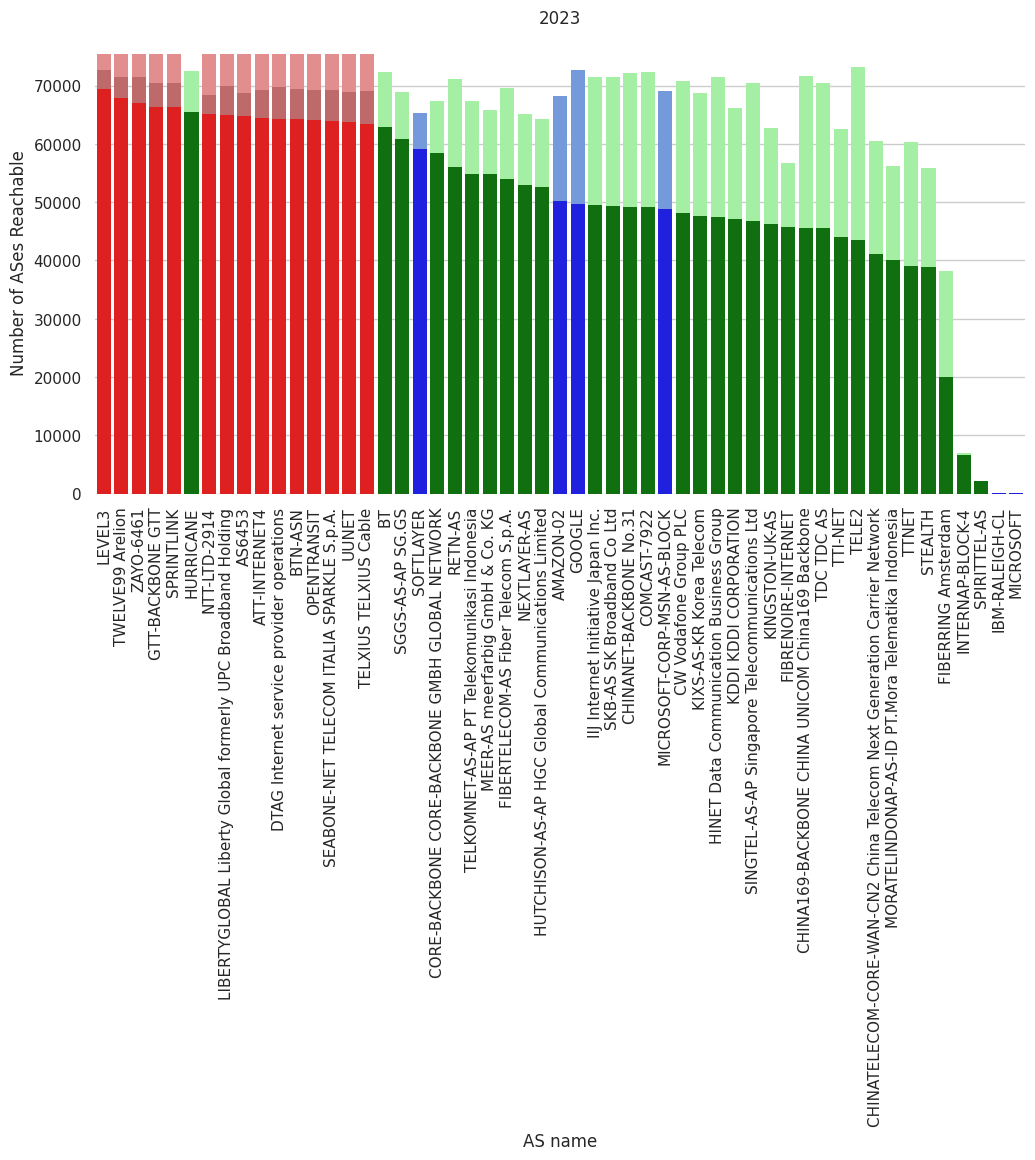

In [72]:
ax = plot(df2023)
ax.set_title("2023")
plt.show()